### Introduction

For this week's assignment I will be analyzing the 30 richest people in the world. The dataset is based on the 500 richest people, but for the purpose of my analysis I will be scaling down to focus on the richest top 30. We will be looking the net worth of the top 30 richest people, how that net worth has changed year-to-date, and the main countries and industries that these people are coming from.

### Dataset import and cleansing
To start, we will import the dataset and drop null or incorrect values.

In [244]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

os.chdir('C:/Users/linds/OneDrive/Documents/MSDS/MSDS 670 - Data Visualization/Week 5')

df = pd.read_csv('500 richest people 2021.csv', delimiter=";")

In [245]:
df.head()

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology,NaN,NaN,NaN,NaN
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology,NaN,NaN,NaN,NaN
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer,NaN,NaN,NaN,NaN
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology,NaN,NaN,NaN,NaN
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology,NaN,NaN,NaN,NaN


In [246]:
df.dropna(axis=1, how='all', inplace=True)

In [247]:
df.tail(5)

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
498,500.0,Odd Reitan,$5.72B,-$19.9M,+$669M,Norway,Food & Beverage
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
df.dropna(axis=0, how='all', inplace=True)

In [249]:
df.tail(5)

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
494,496.0,Lino Saputo,$5.75B,-$48.0M,+$772M,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,$5.74B,-$74.7M,-$1.03B,Indonesia,Energy
496,498.0,Charles Dolan & Family,$5.74B,-$35.8M,+$212M,United States,Media & Telecom
497,499.0,Vladimir Kim,$5.72B,+$2.80M,+$792M,Kazakhstan,Commodities
498,500.0,Odd Reitan,$5.72B,-$19.9M,+$669M,Norway,Food & Beverage


In [250]:
df.drop(df.index[df['Total Net Worth'] == 'family'], inplace=True)
df

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology
...,...,...,...,...,...,...,...
494,496.0,Lino Saputo,$5.75B,-$48.0M,+$772M,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,$5.74B,-$74.7M,-$1.03B,Indonesia,Energy
496,498.0,Charles Dolan & Family,$5.74B,-$35.8M,+$212M,United States,Media & Telecom
497,499.0,Vladimir Kim,$5.72B,+$2.80M,+$792M,Kazakhstan,Commodities


### Visualization #1

Now that we have our dataframe cleaned up, we will begin to further prep our data for visuzliation. To start, the net worth column is represented as a string rather than numeric currency, using letters K, M, and B to represent thousands, millions, and billions. This will not allow us to group or sort correctly. We can convert these to numbers with the below solution.

In [251]:
multipliers = {'K':1000, 'M':1000000, 'B':1000000000}

networth = []
for d in df['Total Net Worth']:
    d = d.replace('$','')
    mult = multipliers[d[-1]]
    d = int(float(d[:-1]) * mult)
    networth.append(d)

#https://stackoverflow.com/questions/51611027/how-to-convert-strings-with-billion-or-million-abbreviation-into-integers-in-a-l

Now we can pull the top 30 names and net worth of the 30 richest people. 

In [214]:
networth30 = networth[:30]

In [215]:
names = df.iloc[:,1]
names30 = names[:30]

For our first visualization, we will show the top 30 richest people with their net worth. Jeff Bezos is the richest man in the world by a substantial amount at \\$188B, followed by Elon Musk at \\$170B. These vary greatly from those farther down the plot such as Zhang Yiming at \\$44.5B.

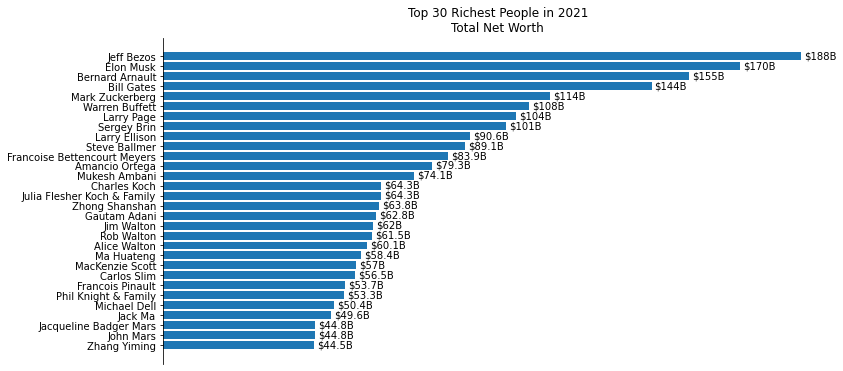

In [253]:
fig, ax = plt.subplots(figsize=(12,6), facecolor='white')

ax.barh(names30, networth30)
ax.set_title('Top 30 Richest People in 2021\nTotal Net Worth')
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    x = "{:g}".format(float(x_value / 1000000000))
    label = '$' + str(x) + 'B'
    ax.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(3, -2.5),         
        textcoords="offset points") 
     
#https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
#https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
#https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
#https://www.kite.com/python/answers/how-to-display-a-float-without-trailing-zeroes-in-python

### Visualization 2

For our second visualization, we will look at how the top 30 richest people's net worth has changed year-to-date. 

Similarly as we did above, we can convert the '$ Change YTD' field to numbers. 

In [45]:
multipliers = {'K':1000, 'M':1000000, 'B':1000000000}

def money(string):
    string = string.replace('$','')
    if 'B' in string:
        string = string.replace('B','')
        return int(float(string) * 1000000000)
    if 'M' in string:
        string = string.replace('M','')
        return int(float(string) * 1000000)
    else:
        string = string.replace('K','')
        return int(float(string) * 1000)
    
df['$ YTD Change'] = df['$ YTD Change'].apply(money)
df

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,188000000000,+$1.68B,-2310000000,United States,Technology
1,2.0,Elon Musk,170000000000,-$2.89B,773000000,United States,Technology
2,3.0,Bernard Arnault,155000000000,+$892M,40900000000,France,Consumer
3,4.0,Bill Gates,144000000000,-$1.32B,12200000000,United States,Technology
4,5.0,Mark Zuckerberg,114000000000,+$203M,10900000000,United States,Technology
...,...,...,...,...,...,...,...
494,496.0,Lino Saputo,5750000000,-$48.0M,772000000,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,5740000000,-$74.7M,-1030000000,Indonesia,Energy
496,498.0,Charles Dolan & Family,5740000000,-$35.8M,212000000,United States,Media & Telecom
497,499.0,Vladimir Kim,5720000000,+$2.80M,792000000,Kazakhstan,Commodities


In [104]:
df30 = df.iloc[:30,:]
df30 = df30.drop(df[['Rank', 'Total Net Worth', '$ Last Change', 'Country', 'Industry']], axis=1)
df30 = df30.sort_values(['$ YTD Change'], ascending=False)
df30['$ YTD Change'] = df30['$ YTD Change'] / 1000000000
df30['$ YTD Change'] = pd.Series(["{0:.2f}".format(val) for val in df30['$ YTD Change']], index = df30.index)
df30['$ YTD Change'] = pd.to_numeric(df30['$ YTD Change'])
df30

,Name,$ YTD Change
2,Bernard Arnault,40.90
16,Gautam Adani,29.00
6,Larry Page,21.60
7,Sergey Brin,20.80
5,Warren Buffett,20.60
29,Zhang Yiming,19.50
11,Amancio Ortega,12.80
3,Bill Gates,12.20
4,Mark Zuckerberg,10.90
8,Larry Ellison,10.90


In [121]:
df30.dtypes

Name             object
$ YTD Change    float64
dtype: object

Below we can see which of the top 30 richest people have lost or gained net worth so far this year. For example, while we saw Jeff Bezos was the richest in the world, he actually lost net worth this year of about \\$2.31B. 

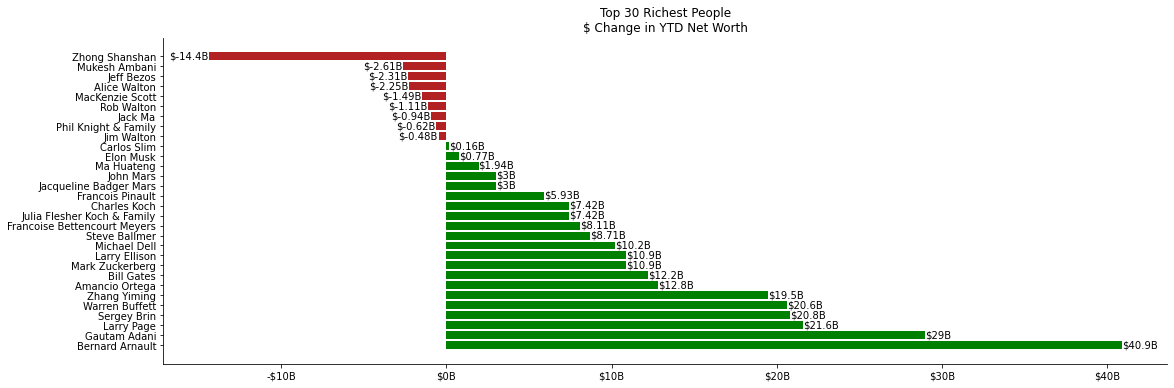

In [194]:
fig, ax = plt.subplots(figsize=(18,6), facecolor='white')
positives = ['$0.16B', '$0.77B', '$1.94B', '$3B', '$5.93B', '$7.42B', '$8.11B', '$8.71B', '$10.2B', '$10.9B', '$12.2B', '$12.8B', '$19.5B', '$20.6B', '$20.8B', '$21.6B', '$29B', '$40.9B']
colors = ["green" if i > 0 else "firebrick" for i in df30['$ YTD Change']]

ax.barh(df30['Name'], df30['$ YTD Change'], color=colors)
ax.set_title('Top 30 Richest People\n$ Change in YTD Net Worth')
ax.set_xticklabels(['', '-$10B', '$0B', '$10B', '$20B', '$30B', '$40B'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    x = "{:g}".format(float(x_value))
    label = '$' + str(x) + 'B'
        
    if label in positives:
        ax.annotate(
        label,                  
        (x_value, y_value),         
        xytext=(0, -2.5),          
        textcoords="offset points")
    else:
        ax.annotate(
            label,                     
            (x_value, y_value),        
            xytext=(-40, -2.5),       
            textcoords="offset points") 


### Visualization #3

For our final visuzliation, we will look at the top countries that the 30 richest people in the world have mainly come from, and which industries they are involved with. We can take a look at how these industries change depending on the country. 

In [218]:
multipliers = {'K':1000, 'M':1000000, 'B':1000000000}

def money(string):
    string = string.replace('$','')
    mult = multipliers[string[-1]]
    return int(float(string[:-1]) * mult)

df['Total Net Worth'] = df['Total Net Worth'].apply(money)
df

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,188000000000,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,170000000000,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,155000000000,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,144000000000,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,114000000000,+$203M,+$10.9B,United States,Technology
...,...,...,...,...,...,...,...
494,496.0,Lino Saputo,5750000000,-$48.0M,+$772M,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,5740000000,-$74.7M,-$1.03B,Indonesia,Energy
496,498.0,Charles Dolan & Family,5740000000,-$35.8M,+$212M,United States,Media & Telecom
497,499.0,Vladimir Kim,5720000000,+$2.80M,+$792M,Kazakhstan,Commodities


In [221]:
df = df.sort_values(['Total Net Worth'], ascending=False)
df30 = df.iloc[:30,:]
df30

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,188000000000,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,170000000000,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,155000000000,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,144000000000,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,114000000000,+$203M,+$10.9B,United States,Technology
5,6.0,Warren Buffett,108000000000,-$2.32B,+$20.6B,United States,Diversified
6,7.0,Larry Page,104000000000,-$1.12B,+$21.6B,United States,Technology
7,8.0,Sergey Brin,101000000000,-$1.06B,+$20.8B,United States,Technology
8,9.0,Larry Ellison,90600000000,-$2.46B,+$10.9B,United States,Technology
9,10.0,Steve Ballmer,89100000000,-$342M,+$8.71B,United States,Technology


In [223]:
countrydf = df30['Total Net Worth'].groupby(df30['Country']).sum().reset_index()
countrydf = countrydf.sort_values(['Total Net Worth'], ascending=False)
countrydf['Total Net Worth'] = pd.to_numeric(countrydf['Total Net Worth'])
countrydf.head()

,Country,Total Net Worth
5,United States,1671200000000
1,France,292600000000
0,China,216300000000
2,India,136900000000
4,Spain,79300000000


In [224]:
countrydf.dtypes

Country            object
Total Net Worth     int64
dtype: object

We can see that most of the wealth is coming from just a few countries. For comparison purposes it makes sense to scale this down to the top 3. 

In [225]:
countrydf['% of Total'] = countrydf['Total Net Worth'] / countrydf['Total Net Worth'].sum()
countrydf['% of Total'] = pd.Series(["{0:.0f}%".format(val * 100) for val in countrydf['% of Total']], index = countrydf.index)
countrydf.head()

,Country,Total Net Worth,% of Total
5,United States,1671200000000,68%
1,France,292600000000,12%
0,China,216300000000,9%
2,India,136900000000,6%
4,Spain,79300000000,3%


In [231]:
countries = ['United States', 'France', 'China']
countrydf5 = df[['Country', 'Total Net Worth', 'Industry']]
countrydf5 = countrydf5[countrydf5.Country.isin(countries)]
countrydf5 = countrydf5.groupby(['Country', 'Industry']).agg({'Total Net Worth':sum}).sort_values(['Total Net Worth'], ascending=False).reset_index()
countrydf5

,Country,Industry,Total Net Worth
0,United States,Technology,1406660000000
1,China,Technology,425809999999
2,France,Consumer,380200000000
3,United States,Finance,333369999998
4,United States,Retail,270920000000
5,United States,Diversified,185700000000
6,United States,Consumer,170300000000
7,United States,Industrial,159390000000
8,United States,Food & Beverage,154700000000
9,United States,Media & Telecom,130600000000


In [232]:
countrydfpivot = countrydf5.pivot(index='Country', columns="Industry", values="Total Net Worth")
countrydfpivot.head()

Industry,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real-Estate,Retail,Services,Technology
Country,,,,,,,,,,,,,,
China,1.590000e+10,1.301900e+11,7.460000e+10,5.236000e+10,NaN,2.359000e+10,8.662000e+10,1.014700e+11,1.110300e+11,NaN,1.204400e+11,9.860000e+09,4.291000e+10,4.258100e+11
France,NaN,3.802000e+11,3.126000e+10,NaN,NaN,NaN,2.959000e+10,7.010000e+09,NaN,1.420000e+10,NaN,NaN,NaN,6.600000e+09
United States,1.434000e+10,1.703000e+11,1.857000e+11,8.287000e+10,9.357000e+10,3.333700e+11,1.547000e+11,7.944000e+10,1.593900e+11,1.306000e+11,9.380000e+10,2.709200e+11,4.575000e+10,1.406660e+12


We can see in the below that wealth from the top 30 richest people in the world is mainly coming from the US, followed by China then France. In the US and China, the technology industry is dominant while in France it is the Consumer industry. 

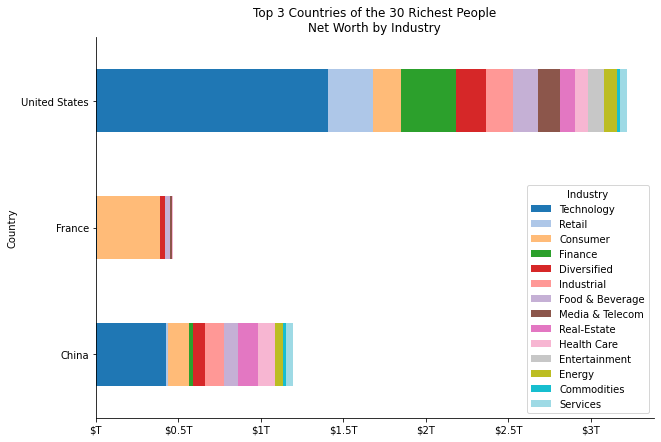

In [234]:
fig, ax = plt.subplots(figsize=(10,7), facecolor='white')

countrydfpivot.loc[:,['Technology', 'Retail', 'Consumer', 'Finance', 'Diversified', 'Industrial', 'Food & Beverage', 'Media & Telecom', 'Real-Estate', 'Health Care', 'Entertainment', 'Energy', 'Commodities', 'Services']].plot.barh(stacked=True, ax=ax, cmap='tab20')
ax.set_title('Top 3 Countries of the 30 Richest People\nNet Worth by Industry')
ax.set_xticklabels(['$T','$0.5T','$1T','$1.5T','$2T','$2.5T', '$3T'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);
#https://pstblog.com/2016/10/04/stacked-charts

### References

Code Faster with Line-of-Code Completions, Cloudless Processing. (n.d.). Retrieved February 10, 2022, from https://www.kite.com

python—Adding value labels on a matplotlib bar chart. (n.d.). Stack Overflow. Retrieved February 10, 2022, from https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

python—How to convert strings with billion or million abbreviation into integers in a list. (n.d.). Stack Overflow. Retrieved February 10, 2022, from https://stackoverflow.com/questions/51611027/how-to-convert-strings-with-billion-or-million-abbreviation-into-integers-in-a-l

python—How to remove frame from matplotlib (pyplot.figure vs matplotlib.figure ) (frameon=False Problematic in matplotlib). (n.d.). Stack Overflow. Retrieved February 10, 2022, from https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame

python—Matplotlib, horizontal bar chart (barh) is upside-down. (n.d.). Stack Overflow. Retrieved February 10, 2022, from https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down

Published. (n.d.). Easy Stacked Charts with Matplotlib and Pandas. Pstblog. Retrieved February 10, 2022, from https://pstblog.com/2016/10/04/stacked-charts
